In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Information on dataset:

The dataset contains records from both ischemic and hemorrhagic strokes. The criteria used to define a stroke was that a stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked (ischemic) by a clot or bursts (hemorrhagic).

In [2]:
#load Dataset
df=pd.read_csv('healthcare_stroke_data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
#shape of data
df.shape

(5110, 12)

In [4]:
#check null value
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
#as we can see id is not important to predict the data so first we will drop the id column
df.drop('id',axis=1,inplace=True)

In [6]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
#now we will handel the missing value
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

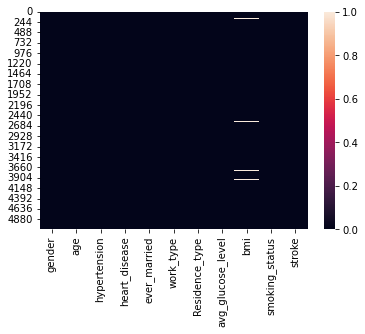

In [8]:
#now we will visualise the missing value
sns.heatmap(df.isnull())

In [9]:
#filling null values with average/mean of bmi
m=df['bmi'].median()
print(m)
df['bmi'].fillna(m,inplace=True)

28.1


In [10]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
#checking null value again
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

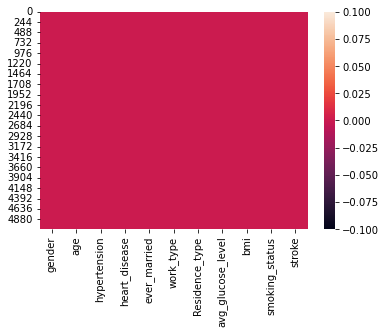

In [12]:
#visualising the null value
sns.heatmap(df.isnull())
plt.show()

In [13]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [14]:
#need to check if target data is balanced or not
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

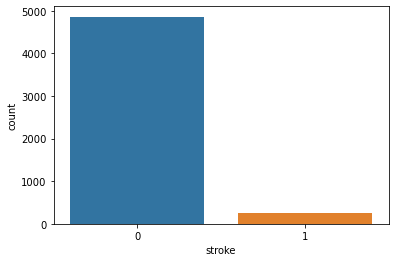

In [15]:
#visualise count of target which is stroke
sns.countplot(data=df,x='stroke')
plt.show()

In [16]:
#now we have to make sure that we should have data set in numerical form as 
#machine only understands the numbers
#so we have to split the data which is numerical and categorical
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [17]:
df_num.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,28.1,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


In [18]:
df_cat.head(5)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [19]:
#now we will convert the data into numeric form by using LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [20]:
for col in df_cat:
    #now create object of LabelEncoder
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [21]:
df_cat

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2
...,...,...,...,...,...
5105,0,1,2,1,2
5106,0,1,3,1,2
5107,0,1,3,0,2
5108,1,1,2,0,1


In [22]:
#noe we can check the data type of df_cat which was categorical data
df_cat.dtypes

gender            int32
ever_married      int32
work_type         int32
Residence_type    int32
smoking_status    int32
dtype: object

In [23]:
#after converting the complete dataset into numerical data types we need to 
#concatenate df_cat and df_num
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.6,1,1,1,2,1,1
1,61.0,0,0,202.21,28.1,1,0,1,3,0,2
2,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2


In [24]:
#just to check how many types of conversion in df_cat data
married=df['ever_married'].value_counts()
print(married)

work=df['work_type'].value_counts()
print(work)

home=df['Residence_type'].value_counts()
print(home)

smoke=df['smoking_status'].value_counts()
print(smoke)

Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [25]:
df_new.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.6,1,1,1,2,1,1
1,61.0,0,0,202.21,28.1,1,0,1,3,0,2
2,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2


In [26]:
#after converting the complete dataset into numerical data types we will split the data into
#input and output
x=df_new.drop('stroke',axis=1) #input
y=df_new['stroke'] #output


In [27]:
#now we will train and test the splited data
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [29]:
#now we will apply standerd scaler on input data before we tarin the model
from sklearn.preprocessing import StandardScaler

In [30]:
#create an object of StandardScaler
ss=StandardScaler()
#we only apply standardScaler on x_train and x_test
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [31]:
x_train

array([[ 0.60884288, -0.33037446, -0.23816135, ..., -0.15281839,
         0.99414629, -1.28066776],
       [-1.88698872, -0.33037446, -0.23816135, ...,  1.684598  ,
        -1.00588818, -1.28066776],
       [-1.03666263, -0.33037446, -0.23816135, ..., -0.15281839,
         0.99414629,  0.58720118],
       ...,
       [-0.54745829, -0.33037446, -0.23816135, ..., -0.15281839,
        -1.00588818,  0.58720118],
       [ 0.07516542, -0.33037446, -0.23816135, ..., -0.15281839,
        -1.00588818,  1.52113566],
       [ 1.09804722, -0.33037446, -0.23816135, ..., -0.15281839,
        -1.00588818, -1.28066776]])

In [32]:
#as we are working on classification data set so first we will create the model of 
#logisticRegression class
#we will use base line model : LogisticRegression
from sklearn.linear_model import LogisticRegression

In [33]:
#create an object of LogisticRegression
lr=LogisticRegression()

In [34]:
#now we will train the model with 70% data by using fit method to check the model accuracy 
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
#to test the model with 30% data use inbuilt method predict
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
#now we will create the table to check the acual and predected result
#create a dictionary
dict={'Actual output':y_test,'predected output':y_pred}
df1=pd.DataFrame(dict)
df1.head(25)

,Actual output,predected output
4673,0,0
3232,0,0
3694,0,0
1070,0,0
4163,0,0
795,0,0
440,0,0
870,0,0
1102,0,0
836,0,0


In [37]:
# Check accuracy of model use inbuilt method score() of LogisticRegression.
lr.score(x_test,y_test)      # Score always varies between 0-1

0.9458577951728636

In [38]:
# now we will generate the classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [39]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533

[[1450    0]
 [  83    0]]


# Report

This Model is not accurate as the recall value of 0 is 100%. Clearly data is imbalanced. Here, there are 2 classes: 0 means NO and 1 means yes The majority class is NO [0(4861 Samples)] and minority class is Yes [1(249 Samples)]. as both the class is not balanced so we have to balance both the class by using Sampling Technique. There are two types of Sampling Technique: 1: RandomOverSampling : it increase minority class on the level of majority class 2: RandomUnderSampling : it decrease Majority class on the level of minority class

# First install inbuilt package imblearn

In [40]:
#!pip install imblearn

In [41]:
# here we use RandomOverSampling inbuilt class
#that means we will craete a duplicate minority class till it match the level of 
#majority class
from imblearn.over_sampling import RandomOverSampler

In [42]:
# Check how many samples of class 0 and 1 class in Y_train
y_train.value_counts()

0    3411
1     166
Name: stroke, dtype: int64

In [43]:
#now apply RandomOverSampler class
ros=RandomOverSampler(random_state=1)

In [44]:
#use inbuilt method of fit_resample() of RandomOverSampler class
x_train_ros,y_train_ros=ros.fit_resample(x_train,y_train)

In [45]:
#now will check if the training data is balanced or not
y_train_ros.value_counts()

0    3411
1    3411
Name: stroke, dtype: int64

In [46]:
#As it is we will check how many samples of class 0 and 1 class in y_test 
y_test.value_counts()

0    1450
1      83
Name: stroke, dtype: int64

In [47]:
# Now apply RandomOverSampler on testing data
x_test_ros,y_test_ros=ros.fit_resample(x_test,y_test)

In [48]:
#again Check
y_test_ros.value_counts()

0    1450
1    1450
Name: stroke, dtype: int64

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
#create a function
def create_model(model):
    model.fit(x_train_ros,y_train_ros)  #train the model with 70% data
    y_pred=model.predict(x_test_ros)    #test the model with 70% data
    print(classification_report(y_test_ros,y_pred))
    print(confusion_matrix(y_test_ros,y_pred))
    return model

In [51]:
# now again we use logistic regression as we already imported
lr=LogisticRegression()

In [52]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1450
           1       0.75      0.83      0.79      1450

    accuracy                           0.78      2900
   macro avg       0.78      0.78      0.78      2900
weighted avg       0.78      0.78      0.78      2900

[[1049  401]
 [ 247 1203]]


In [53]:
#as we can see the accuracy is not good so we will move to another algorithm

Accuracy through Logistic Regression on data set is 78%

# Decision Tree Algo

In [54]:
#now we will perform the data set with Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [55]:
#create the object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1) #bydefault Gini index
#call function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.54      0.96      0.69      1450
           1       0.82      0.17      0.29      1450

    accuracy                           0.57      2900
   macro avg       0.68      0.57      0.49      2900
weighted avg       0.68      0.57      0.49      2900

[[1396   54]
 [1200  250]]


Accuracy through Decision Tree Algoritm on data set is 57%

In [56]:
#now we will check the information gain from all input
IG=dt.feature_importances_ #feature importance inbuilt method of DecisionTreeClassifier
print('Information gain:',IG)

Information gain: [0.45159893 0.00798188 0.01444108 0.20230254 0.21745135 0.01461983
 0.00418138 0.03450314 0.01045427 0.0424656 ]


In [57]:
x.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [58]:
#create a dictionary
dict={'input':x.columns,'IG':IG}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False) #Descending order according to information gain

,input,IG
0,age,0.451599
4,bmi,0.217451
3,avg_glucose_level,0.202303
9,smoking_status,0.042466
7,work_type,0.034503
5,gender,0.014620
2,heart_disease,0.014441
8,Residence_type,0.010454
1,hypertension,0.007982
6,ever_married,0.004181


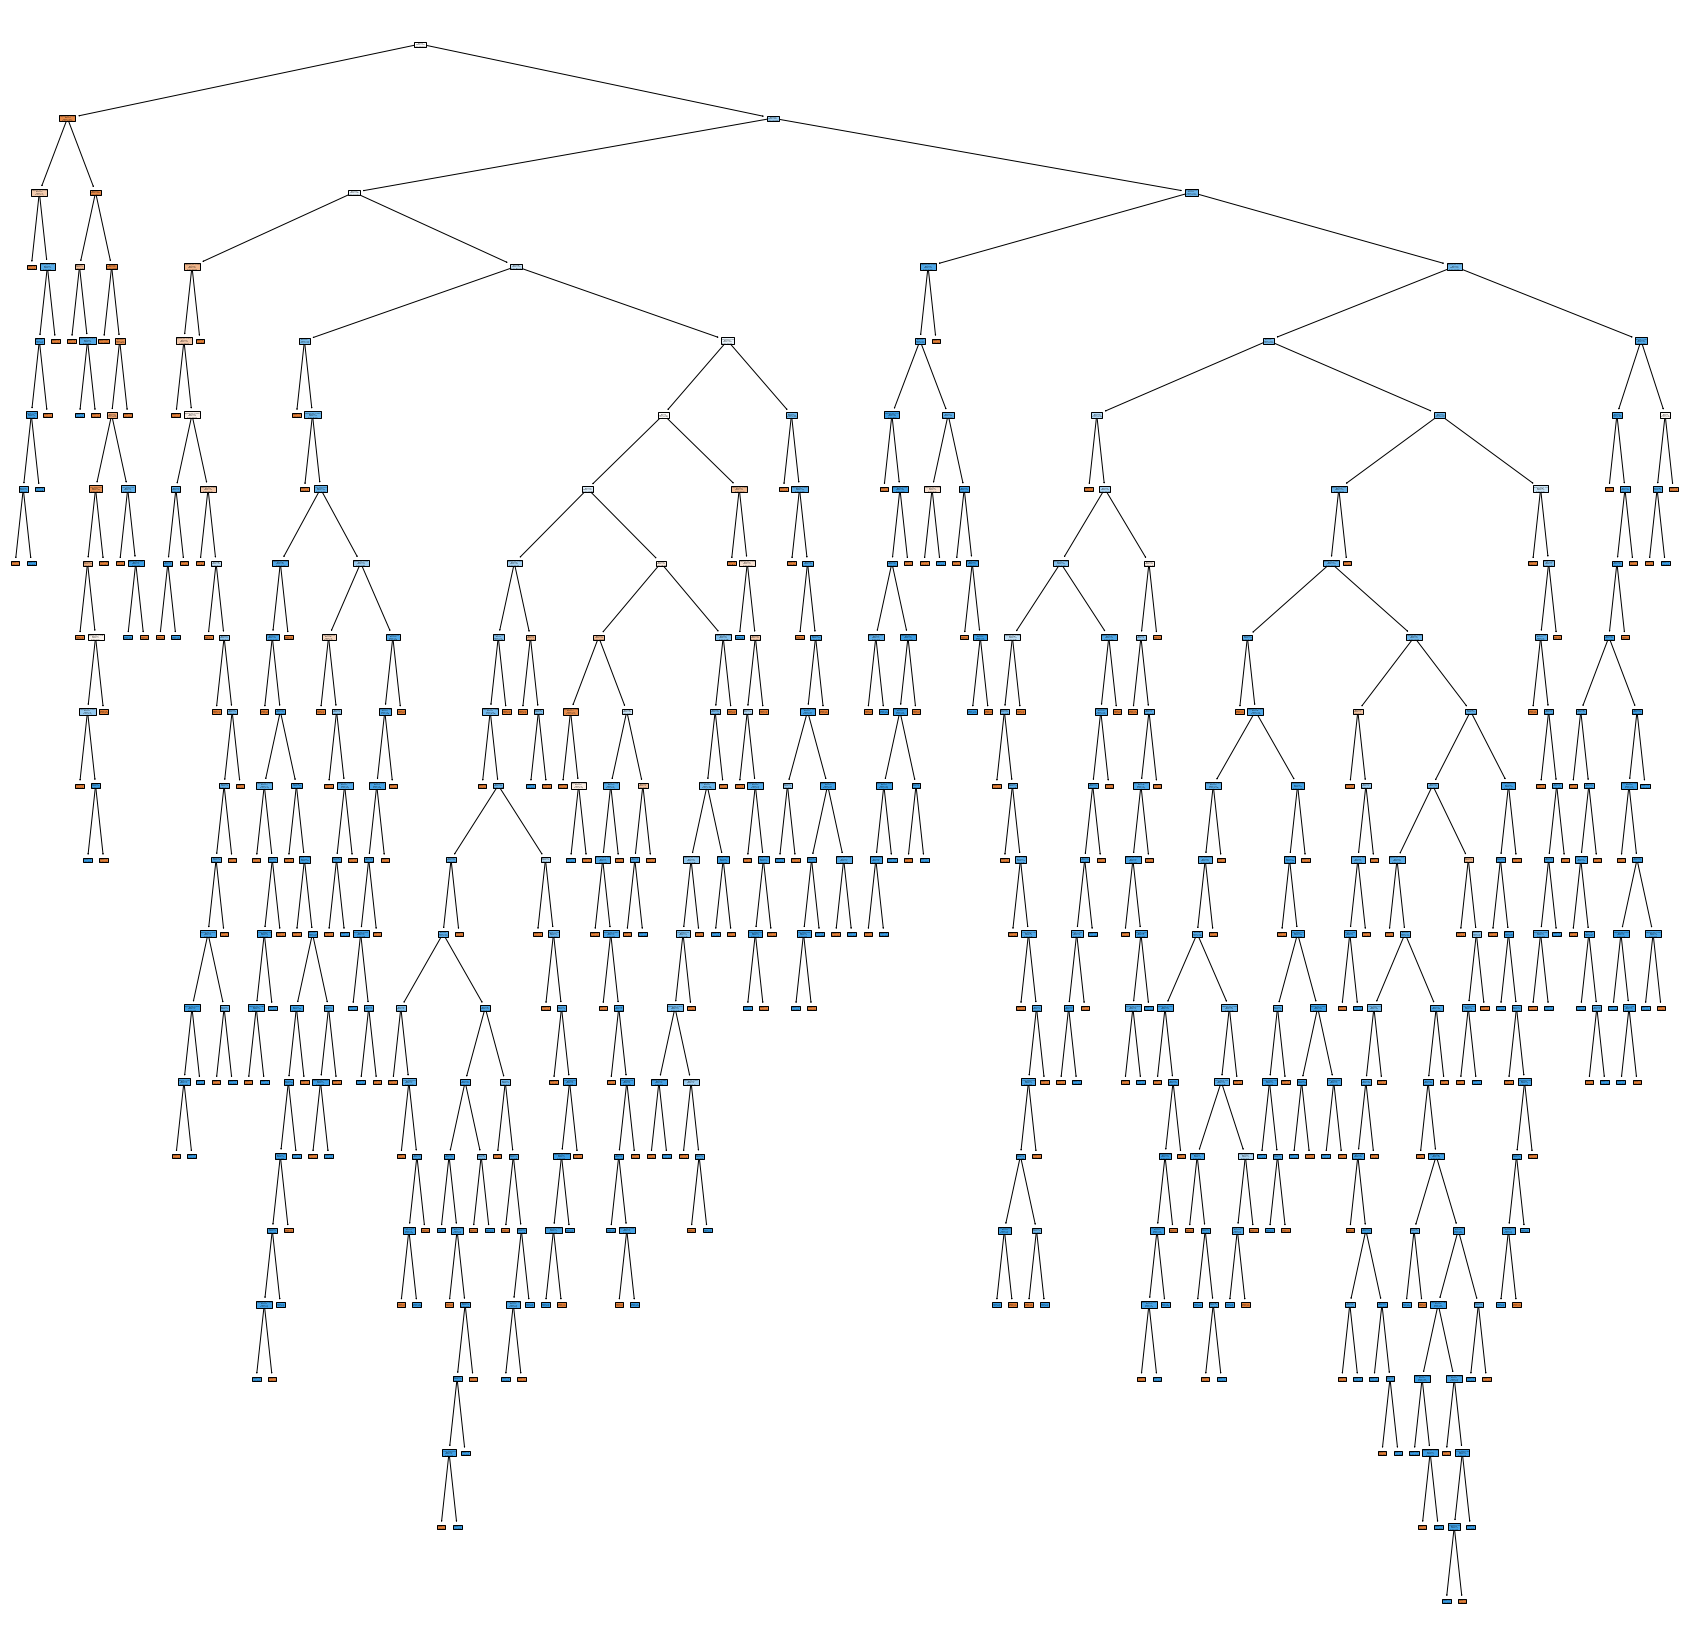

In [59]:
#create Tree
from sklearn import tree
features=x.columns #input features
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt,feature_names=features,filled=True)

# Pruning Technique

1st Technique is max depth(reduce overfitting): Note: passing parameter value or maximum depth can not greater than 8

In [60]:
#create the object of DecisionTreeClassifier class and passing the parameter of maxdepth
dt1=DecisionTreeClassifier(random_state=1,max_depth=5)

In [61]:
#call in main fucntion
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1450
           1       0.81      0.74      0.77      1450

    accuracy                           0.78      2900
   macro avg       0.78      0.78      0.78      2900
weighted avg       0.78      0.78      0.78      2900

[[1198  252]
 [ 383 1067]]


Accuracy of the model from Decision Tree Classifier through 1st Purning Technique i.e. maxdepth is 78%.

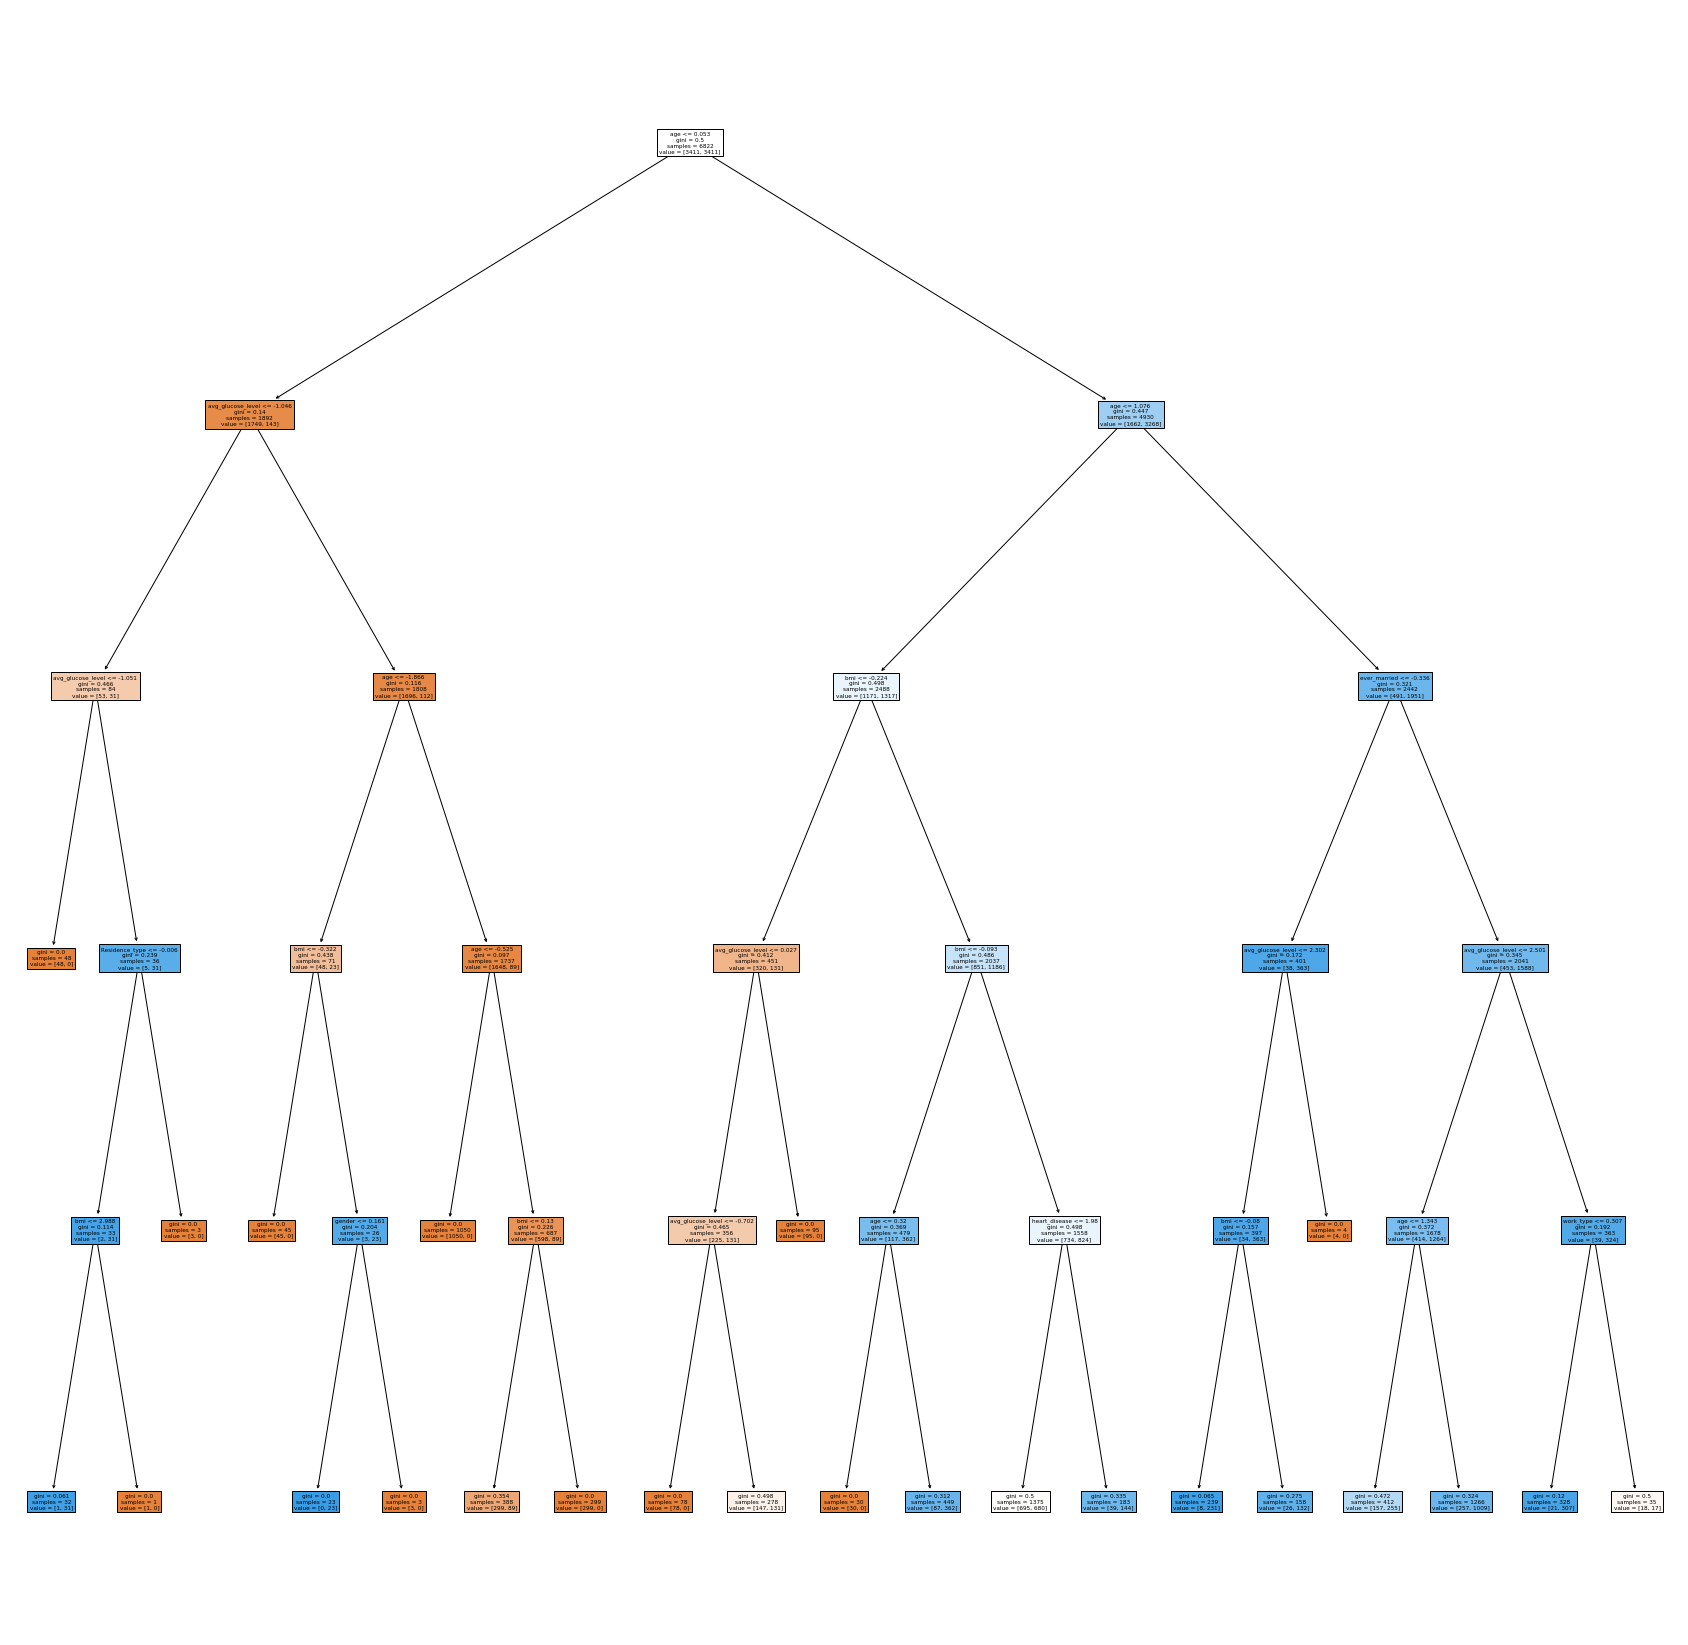

In [62]:
#create the tree
features=x.columns #input features
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [63]:
#create a dictrony IG information gain 
IG=dt1.feature_importances_
dict={'Input':x.columns,'IG':IG} 
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False) #decending order according to IG


,Input,IG
0,age,0.788881
4,bmi,0.097880
3,avg_glucose_level,0.072944
2,heart_disease,0.018107
7,work_type,0.008411
6,ever_married,0.007112
5,gender,0.003481
8,Residence_type,0.003184
1,hypertension,0.000000
9,smoking_status,0.000000


# 2nd Purning Technique:

min_samples_leaf

min_sample_leaf should be minimum 45 not less than 45 and maximum 100 not more than that create object of DecisionTreeClassifier class - leaf node

In [64]:
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=65)

In [65]:
'''#check min_samples_leaf at different levels - by Gini method which is by default
for i in range(45,100,5):
    print('Minimum Sample Leaf: ',i)
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    #call in function
    dt2=create_model(dt2)'''

"#check min_samples_leaf at different levels - by Gini method which is by default\nfor i in range(45,100,5):\n    print('Minimum Sample Leaf: ',i)\n    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)\n    #call in function\n    dt2=create_model(dt2)"

In [66]:
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=85)
#call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1450
           1       0.74      0.78      0.76      1450

    accuracy                           0.75      2900
   macro avg       0.75      0.75      0.75      2900
weighted avg       0.75      0.75      0.75      2900

[[1055  395]
 [ 323 1127]]


Accuracy of the model from Decision Tree Classifier through 2nd Purning Technique i.e. minimum sample leaf (Gini) is 75%

In [67]:
#Now we will check minimum sample leaf by entropy method
'''for i in range(45,100,5):
    print('Minimum Sample Leaf: ',i)
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy')
    #call in function
    dt2=create_model(dt2)'''

"for i in range(45,100,5):\n    print('Minimum Sample Leaf: ',i)\n    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy')\n    #call in function\n    dt2=create_model(dt2)"

In [68]:
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=85,criterion='entropy')
#call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1450
           1       0.73      0.73      0.73      1450

    accuracy                           0.73      2900
   macro avg       0.73      0.73      0.73      2900
weighted avg       0.73      0.73      0.73      2900

[[1059  391]
 [ 385 1065]]


Accuracy of the model from Decision Tree Classifier through 2nd Purning Technique i.e. minimum sample leaf (entropy) is 73%.

# Ensembling Technique

Ensembling Technique means to train the same dataset from multiple algorithm such as Randome Forest Tree. Random Forest Tree is to train the dataset on multiple decisiontreeclassifier algorithm

# RandomForestTree

In [69]:
x.shape

(5110, 10)

In [70]:
#import RandomForestClassifier class from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [71]:
#for i in range(1,150):
rfc=RandomForestClassifier(n_estimators=50)
    #it is by default gini method of RFC 
    #note: entropy will not work here
    #call in function
print('Number of features: ')
##rfc.fit(x_train_ros,y_train_ros)
#y_pred=rfc.predict(x_test_ros)
#print(classification_report(y_test_ros,y_pred))
#print(confusion_matrix(y_test_ros,y_pred))
    
rfc=create_model(rfc)
#n_estimators is the number of decision tree on which we want to check that
#the accuracy on how many features it will give 
#max_features means to take how many no of input
#basically we will take all the input 

Number of features: 
              precision    recall  f1-score   support

           0       0.51      0.99      0.67      1450
           1       0.84      0.04      0.08      1450

    accuracy                           0.52      2900
   macro avg       0.67      0.52      0.38      2900
weighted avg       0.67      0.52      0.38      2900

[[1438   12]
 [1389   61]]


As we can see Random Forest technique in not working. Because it is not giving any accuracy on the dataset. The accuracy of the model is 51% from Random Forest Technique.

# Boosting Technique

Boosting technique is also type of Ensembling technique.

As there is 3 types of Boosting Technique.

1. ADA Boosting
2. Gradient Boosting
3. Extreme Gradient Boosting

# 1. ADA Boosting: Adaptive boosting

In [72]:
#import the AdaBoostClassifier from sklearn library
from sklearn.ensemble import AdaBoostClassifier

In [73]:
#create an object of AdaBoostClassifier
for i in range(1,10):
    ada=AdaBoostClassifier(random_state=1,n_estimators=i)
    #n_estimators is number of features
    print('Number of Features: ',i)
    #call in class
    ada=create_model(ada)

Number of Features:  1
              precision    recall  f1-score   support

           0       0.92      0.53      0.68      1450
           1       0.67      0.96      0.79      1450

    accuracy                           0.74      2900
   macro avg       0.80      0.74      0.73      2900
weighted avg       0.80      0.74      0.73      2900

[[ 774  676]
 [  65 1385]]
Number of Features:  2
              precision    recall  f1-score   support

           0       0.92      0.53      0.68      1450
           1       0.67      0.96      0.79      1450

    accuracy                           0.74      2900
   macro avg       0.80      0.74      0.73      2900
weighted avg       0.80      0.74      0.73      2900

[[ 774  676]
 [  65 1385]]
Number of Features:  3
              precision    recall  f1-score   support

           0       0.90      0.57      0.70      1450
           1       0.69      0.94      0.79      1450

    accuracy                           0.76      2900
   ma

In [74]:
# Check Information gain of all inputs using inbuilt method 
# feature_importances_
ada.feature_importances_

array([0.55555556, 0.        , 0.        , 0.11111111, 0.33333333,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [75]:
#as we can see ada boosting is giving the accuracy with 1 features
#so we will take the first one which is Number of features : 1

In [76]:
# Show information gain of all inputs.
IG=ada.feature_importances_
dict={'Input':x.columns,'IG':IG}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Input,IG
0,age,0.555556
4,bmi,0.333333
3,avg_glucose_level,0.111111
1,hypertension,0.000000
2,heart_disease,0.000000
5,gender,0.000000
6,ever_married,0.000000
7,work_type,0.000000
8,Residence_type,0.000000
9,smoking_status,0.000000


In [77]:
ada=AdaBoostClassifier(random_state=1,n_estimators=1)
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.92      0.53      0.68      1450
           1       0.67      0.96      0.79      1450

    accuracy                           0.74      2900
   macro avg       0.80      0.74      0.73      2900
weighted avg       0.80      0.74      0.73      2900

[[ 774  676]
 [  65 1385]]


Accuracy through ADA Boosting on data set is 74%.

# 2. Gradient Boosting

In [78]:
#import the AdaBoostClassifier from sklearn library
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
#create an object of GradientBoostingClassifier
'''for i in range(1,100):
    gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
    print('Number of Decision Tree by Gradient: ',i)
    gbc=create_model(gbc)'''

"for i in range(1,100):\n    gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)\n    print('Number of Decision Tree by Gradient: ',i)\n    gbc=create_model(gbc)"

In [80]:
#01    0=62 and 1=92
#create an object of GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=1,n_estimators=1)
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.89      0.62      0.73      1450
           1       0.71      0.92      0.80      1450

    accuracy                           0.77      2900
   macro avg       0.80      0.77      0.77      2900
weighted avg       0.80      0.77      0.77      2900

[[ 901  549]
 [ 109 1341]]


Accuracy through Gradient Boosting on data set is 77%

# 3. Extreme Gradient Boosting

Extreme Gradient Boosting : XG Boosting It is the 3rd technique of Boosting. This is also a better version of Gradient Boosting, becuase of below mention reasons.

1. XGB uses Multithreading technique.
2. XGB occupy less space in memory and much more faster than GB.
3. XGB is very useful to handle large amount of data.
4. XGB also handle outlier, because XGB have inbilt capability to handle the same.
5. XGB also handle null values.
6. XGB also handle automatic overfitting situation.

In [81]:
#!pip install xgboost

In [82]:
#XGB has the seperate library
from xgboost import XGBClassifier

In [83]:
'''
for i in range(1,101):
    #create an object of XGBClassifer
    xgbc=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1)
    print('Number of Decision Tree by XGBoosting: ',i)
    #call in function
    xgbc=create_model(xgbc)'''

"\nfor i in range(1,101):\n    #create an object of XGBClassifer\n    xgbc=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1)\n    print('Number of Decision Tree by XGBoosting: ',i)\n    #call in function\n    xgbc=create_model(xgbc)"

In [84]:
# Number of Decision Tree by XGBoosting:  1
#0=72 and 1=81
#create an object of XGBClassifier
xgbc=XGBClassifier(n_estimators=1,random_state=1,reg_alpha=1)
xgbc=create_model(xgbc)

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1450
           1       0.73      0.81      0.77      1450

    accuracy                           0.76      2900
   macro avg       0.76      0.76      0.76      2900
weighted avg       0.76      0.76      0.76      2900

[[1021  429]
 [ 277 1173]]


Accuracy through Extreme Gradient Boosting on data set is 76%

# Support Vector Machine

Support Vector Machine is a classification supervised machine learning Algorithm.

There are various kernel functions:

1. Linear Kernel Function ( use Linear seperated Data)
2. Polynomial Kernel Function ( use non-linearly)
3. Radial Basis Kernel function ( use non-linearly

# 1. Linear Kernel Function ( use Linear seperated Data)

Linear Kernel or linear seperated data means data are easily seperatable with the help of straight line. This straight line is called Decision Boundry or Hyperplane

In [85]:
#import support vector classifier from sklearn library
from sklearn.svm import LinearSVC

In [86]:
# create an object of SVC it would be hard margin bydefault
svc=LinearSVC(random_state=1)

In [87]:
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1450
           1       0.74      0.83      0.78      1450

    accuracy                           0.77      2900
   macro avg       0.78      0.77      0.77      2900
weighted avg       0.78      0.77      0.77      2900

[[1038  412]
 [ 247 1203]]


Accuracy of the model from Support Vector Machine through Linear Kernel Function (Hard Margin) is 77%.

In [88]:
#now will have to check outlier because model can be overfit even if accuracy is good it it has outlier also.
#also need to check whether model is over fit or not means need to add extra error during training themodel.
#that means we need to apply soft margin
#create the object of inbuilt class Linear SVC and passing the error through parameter C
svc1=LinearSVC(random_state=1,C=0.001) #soft margin
#C is inbuilt marameter which pass the value (0.001 to 1)

In [89]:
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1450
           1       0.75      0.86      0.80      1450

    accuracy                           0.78      2900
   macro avg       0.79      0.78      0.78      2900
weighted avg       0.79      0.78      0.78      2900

[[1027  423]
 [ 201 1249]]


Accuracy of the model from Support Vector Machine through Linear Kernel Function (Soft Margin) is 78%.

In [90]:
#if add external error during training time , no changes in score(recall)
#means data is non-linear
#can be possible , dataset is not linear means dataset is non-linear  .
#use Non-linear Kernel function of SVM means 2 classes are not separatable 
#with straight line 
#There are 3 types of Kernel function of SVM
#1. Linear SVC  : use for linear data
#2. polynomial Kernel function : increase the low dimension to high dimension
#3. radial basis Kernel function

# 2. polynomial Kernel function :

Increase the low dimension to high dimension

In [91]:
#2. polynomial Kernel function
from sklearn.svm import SVC
#svc inbuilt class for non linear data (poly adn radial basis)

In [92]:
#create object of svc clas (for polynomial)
poly_svc=SVC(random_state=1,kernel='poly')

In [93]:
#call the function
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.64      0.81      0.72      1450
           1       0.74      0.55      0.63      1450

    accuracy                           0.68      2900
   macro avg       0.69      0.68      0.67      2900
weighted avg       0.69      0.68      0.67      2900

[[1177  273]
 [ 656  794]]


Accuracy of the model from Support Vector Machine through Polynomial Kernel Function is 68%.

# 3. Radial Basis Kernel function :

In [94]:
#here we use non-linear : radial basis Kernel function
#create object of svc class (for radial-basis)
r_svc=SVC(random_state=1,kernel='rbf')#rbf means radial basis function
#call the function
r_svc=create_model(r_svc)

              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1450
           1       0.73      0.56      0.63      1450

    accuracy                           0.68      2900
   macro avg       0.68      0.68      0.67      2900
weighted avg       0.68      0.68      0.67      2900

[[1142  308]
 [ 633  817]]


Accuracy of the model from Support Vector Machine through Radial Basis Kernel Function is 68%.

# KNN Algorithm

In [95]:
#use KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

In [96]:
#create object
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [97]:
#call function
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.52      0.90      0.66      1450
           1       0.64      0.18      0.28      1450

    accuracy                           0.54      2900
   macro avg       0.58      0.54      0.47      2900
weighted avg       0.58      0.54      0.47      2900

[[1301  149]
 [1188  262]]


Accuracy of KNN model is 54%.

# Naive Bayes Classifier

Here we will apply Gaussian Naive Bayes classifier as we are working on continious value

In [98]:
from sklearn.naive_bayes import GaussianNB
#inbuilt class GaussionNB

In [99]:
#create object 
gnb=GaussianNB()

In [100]:
#call function
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1450
           1       0.76      0.79      0.78      1450

    accuracy                           0.77      2900
   macro avg       0.77      0.77      0.77      2900
weighted avg       0.77      0.77      0.77      2900

[[1093  357]
 [ 304 1146]]


# Summary

1. Accuracy through Logistic Regression on data set is 78%.
2. Accuracy through Decision Tree Algoritm on data set is 57%.
3. Accuracy of the model from Decision Tree Classifier through 1st Purning Technique i.e. maxdepth is 78%.
4. Accuracy of the model from Decision Tree Classifier through 2nd Purning Technique i.e. minimum sample leaf (Gini) is 75%.
5. Accuracy of the model from Decision Tree Classifier through 2nd Purning Technique i.e. minimum sample leaf (entropy) is 73%.
6. Accuracy of the model throgh Random Forest Technique is 51%.
7. Accuracy through ADA Boosting on data set is 74%.
8. Accuracy through Gradient Boosting on data set is 77%.
9. Accuracy through Extreme Gradient Boosting on data set is 76%.
10. Accuracy of the model from Support Vector Machine through Linear Kernel Function (Hard Margin) is 77%.
11. Accuracy of the model from Support Vector Machine through Linear Kernel Function (Soft Margin) is 78%.
12. Accuracy of the model from Support Vector Machine through Polynomial Kernel Function is 68%.
13. Accuracy of the model from Support Vector Machine through Radial Basis Kernel Function is 68%.
14. Accuracy through KNN model is 54%.
15. Accuracy through Naive Bayes Classifier is 77%.

# Final Conclusion

Logistic Regression, max_depth purning technique of decision tree classifier and Linear kernel Function (soft margin) of Support vector machine is the best algoritim to predict the strock for the data set as the accuracy of all 3 algoritm is 78%.